# Onset Envelope

### Cell 1 - Imports

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
#import random for showcase appendix
import random


### Cell 2 - Grab the file paths for all the music files

In [3]:
DATASET_PATH = "Data/genres_original"
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
file_paths = []
genre_count = []

# Iterate through each genre and load the audio files
for genre in genres:
    genre_path = os.path.join(DATASET_PATH, genre)
    if os.path.isdir(genre_path):
        for file in os.listdir(genre_path):
            if file.endswith(".wav"):
                file_path = os.path.join(genre_path, file)
                try:
                    # Add file path to the list
                    file_paths.append(file_path)
                    # Assign label based on genre index
                    genre_count.append(genres.index(genre))
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
                    continue

# Print the number of loaded files and labels
print("Files loaded:", len(file_paths))
print("Labels loaded:", len(genre_count))
print("Genres loaded:", len(genres))

genre_count[400], file_paths[400]

Files loaded: 1000
Labels loaded: 1000
Genres loaded: 10


(4, 'Data/genres_original\\hiphop\\hiphop.00000.wav')

### Cell 3 - Show an example of a spectogram on the console

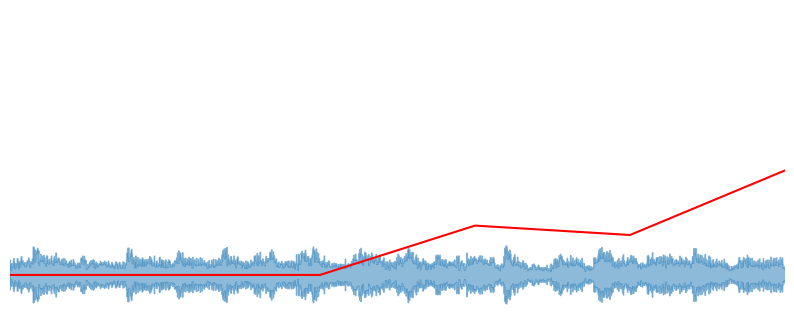

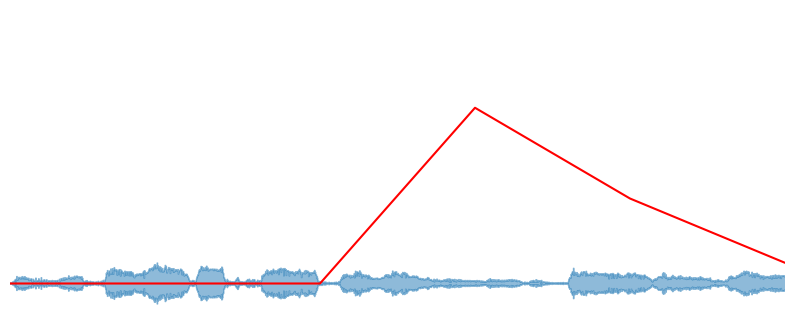

In [4]:
%matplotlib inline
# CHANGE THE 2 for more showcases
for i in range(2):
    f = random.randint(1,100)
    # Load the audio
    y, sr = librosa.load(file_paths[f], sr=22050)
    # In simple terms: The onset envelope is a graph showing sudden changes in amplitude, strength and intensity
    onset = librosa.onset.onset_strength(y=y, sr=sr)


    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(onset, label='Onset Envelope', color='r', linewidth=1.5)

    #crops the top half of the image as it is just empty space (may need to adjust the values)
    #plt.ylim(-1, 5)  # This limits the vertical range to raise the wave and line
    #limits to only 5 secs
    plt.xlim(0,5)


    plt.gca().set_axis_off()  # Remove axes
    plt.gca().set_facecolor('none')  # Transparent background

    plt.show()

### Cell 4 - Create the folders to put the code into and create all onset envelope for each .wav file across three separate n_mel values

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import gc

def create_onset_envelope(genre, file_path):
   # Load the audio
    y, sr = librosa.load(file_path, sr=22050)
    # In simple terms: The onset envelope is a graph showing sudden changes in amplitude, strength and intensity
    onset = librosa.onset.onset_strength(y=y, sr=sr)


    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(onset, label='Onset Envelope', color='r', linewidth=1.5)

    #crops the top half of the image as it is just empty space (may need to adjust the values)
    #plt.ylim(-1, 8)  # This limits the vertical range to raise the wave and line
    #limits to only 5 secs
    plt.xlim(0,5)


    plt.gca().set_axis_off()  # Remove axes
    plt.gca().set_facecolor('none')  # Transparent background
    
    # Create the path for saving the image
    savingFilePath = os.path.join("Data", "onset_envelopes", genre, os.path.basename(file_path[:-4]) + ".png")
    
    # Create any missing directories
    os.makedirs(os.path.dirname(savingFilePath), exist_ok=True)
    
    # Save the image
    plt.savefig(savingFilePath, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)
    plt.clf()
    plt.close()

    if i % 25 ==0:
        gc.collect()


# Create the parent directory for the onset envelopes
path = os.path.join("Data", "onset_envelopes")
os.makedirs(path, exist_ok=True)

# Creating the directories for the genres (no need for n_mels)
for genre in genres:
    folder_path = os.path.join("Data", "onset_envelopes", genre)
    os.makedirs(folder_path, exist_ok=True)

# Example loop to generate onset envelopes
for i in range(len(file_paths)):  # Iterate over all file paths
    genre = genres[genre_count[i]]  # Ensure the genre matches the index
    file_path = file_paths[i]  # Get the corresponding file path
    print(file_path)
    create_onset_envelope(genre, file_path)

Data/genres_original\blues\blues.00000.wav
Data/genres_original\blues\blues.00001.wav
Data/genres_original\blues\blues.00002.wav
Data/genres_original\blues\blues.00003.wav
Data/genres_original\blues\blues.00004.wav
Data/genres_original\blues\blues.00005.wav
Data/genres_original\blues\blues.00006.wav
Data/genres_original\blues\blues.00007.wav
Data/genres_original\blues\blues.00008.wav
Data/genres_original\blues\blues.00009.wav
Data/genres_original\blues\blues.00010.wav
Data/genres_original\blues\blues.00011.wav
Data/genres_original\blues\blues.00012.wav
Data/genres_original\blues\blues.00013.wav
Data/genres_original\blues\blues.00014.wav
Data/genres_original\blues\blues.00015.wav
Data/genres_original\blues\blues.00016.wav
Data/genres_original\blues\blues.00017.wav
Data/genres_original\blues\blues.00018.wav
Data/genres_original\blues\blues.00019.wav
Data/genres_original\blues\blues.00020.wav
Data/genres_original\blues\blues.00021.wav
Data/genres_original\blues\blues.00022.wav
Data/genres

## 4.5 - Onset Images (30 seconds)

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import gc

def create_onset_image(genre, file_path):
    # Load the audio (full 30 seconds)
    y, sr = librosa.load(file_path, sr=22050)
    
    # Calculate onset strength for the entire clip
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    
    # Create a 2D representation - reshape the onset envelope into a square-ish matrix
    # This makes it more suitable for CNN processing
    matrix_size = int(np.sqrt(len(onset_env)))
    if matrix_size == 0:  # Handle very short clips
        matrix_size = 1
    
    # Pad or trim to make it fit into a square matrix
    onset_padded = np.zeros(matrix_size * matrix_size)
    onset_padded[:min(len(onset_env), len(onset_padded))] = onset_env[:min(len(onset_env), len(onset_padded))]
    onset_matrix = onset_padded.reshape(matrix_size, matrix_size)
    
    # Create a figure with tight layout and no extra space
    plt.figure(figsize=(5, 5), frameon=False)
    
    # Create the subplot with no padding
    ax = plt.subplot(111)
    
    # Plot as an image - more CNN friendly
    im = ax.imshow(onset_matrix, cmap='viridis', aspect='auto', interpolation='nearest')
    
    # Remove axes, ticks, and labels
    ax.set_axis_off()
    
    # Set the background to transparent
    ax.set_facecolor('none')
    
    # Remove all margins and padding
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    
    # Prepare the saving path
    savingFilePath = os.path.join("Data", "onset_images_full", genre,
                                os.path.basename(file_path[:-4]) + ".png")
    
    # Create any missing directories
    os.makedirs(os.path.dirname(savingFilePath), exist_ok=True)
    
    # Save with tight bounding box and explicitly set zero padding
    plt.savefig(savingFilePath, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300, format='png')
    
    # Clean up
    plt.clf()
    plt.close('all')  # Close all figures to prevent memory leaks
    
    # Optionally, collect garbage to manage memory usage
    gc.collect()

# Create the parent directory for the onset images
os.makedirs(os.path.join("Data", "onset_images_full"), exist_ok=True)

# Create the folders for saving the onset images
for genre in genres:
    os.makedirs(os.path.join("Data", "onset_images_full", genre), exist_ok=True)

# Iterate through each song, generating one image per full song
for i in range(len(file_paths)):  # Iterate over all file paths
    genre = genres[genre_count[i]]  # Ensure the genre matches the index
    file_path = file_paths[i]  # Get the corresponding file path
    print(f"Processing onset image for {file_path}")
    create_onset_image(genre, file_path)

Processing onset image for Data/genres_original\blues\blues.00000.wav
Processing onset image for Data/genres_original\blues\blues.00001.wav
Processing onset image for Data/genres_original\blues\blues.00002.wav
Processing onset image for Data/genres_original\blues\blues.00003.wav
Processing onset image for Data/genres_original\blues\blues.00004.wav
Processing onset image for Data/genres_original\blues\blues.00005.wav
Processing onset image for Data/genres_original\blues\blues.00006.wav
Processing onset image for Data/genres_original\blues\blues.00007.wav
Processing onset image for Data/genres_original\blues\blues.00008.wav
Processing onset image for Data/genres_original\blues\blues.00009.wav
Processing onset image for Data/genres_original\blues\blues.00010.wav
Processing onset image for Data/genres_original\blues\blues.00011.wav
Processing onset image for Data/genres_original\blues\blues.00012.wav
Processing onset image for Data/genres_original\blues\blues.00013.wav
Processing onset ima

## 5 - Onset Images (3 seconds)

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import gc

def create_onset_image_clip(genre, file_path, clip_number, total_clips=10):
    # Load the audio
    y, sr = librosa.load(file_path, sr=22050)
    
    # Calculate the start and end time for the clip
    start_time = (clip_number - 1) * 3  # 3-second intervals
    end_time = clip_number * 3
    
    # Slice the audio to the desired time segment
    y_segment = y[int(start_time * sr): int(end_time * sr)]
    
    # Calculate onset strength
    onset_env = librosa.onset.onset_strength(y=y_segment, sr=sr)
    
    # Create a 2D representation - reshape the onset envelope into a square-ish matrix
    # This makes it more suitable for CNN processing
    matrix_size = int(np.sqrt(len(onset_env)))
    if matrix_size == 0:  # Handle very short clips
        matrix_size = 1
    
    # Pad or trim to make it fit into a square matrix
    onset_padded = np.zeros(matrix_size * matrix_size)
    onset_padded[:min(len(onset_env), len(onset_padded))] = onset_env[:min(len(onset_env), len(onset_padded))]
    onset_matrix = onset_padded.reshape(matrix_size, matrix_size)
    
    # Create a figure with tight layout and no extra space
    plt.figure(figsize=(5, 5), frameon=False)
    
    # Create the subplot with no padding
    ax = plt.subplot(111)
    
    # Plot as an image - more CNN friendly
    im = ax.imshow(onset_matrix, cmap='viridis', aspect='auto', interpolation='nearest')
    
    # Remove axes, ticks, and labels
    ax.set_axis_off()
    
    # Set the background to transparent
    ax.set_facecolor('none')
    
    # Remove all margins and padding
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    
    # Prepare the saving path
    savingFilePath = os.path.join("Data", "onset_images (3 secs)", genre, 
                                 os.path.basename(file_path[:-4]) + f"_clip_{clip_number}_of_{total_clips}.png")
    
    # Create any missing directories
    os.makedirs(os.path.dirname(savingFilePath), exist_ok=True)
    
    # Save with tight bounding box and explicitly set zero padding
    plt.savefig(savingFilePath, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300, format='png')
    
    # Clean up
    plt.clf()
    plt.close('all')  # Close all figures to prevent memory leaks
    
    # Optionally, collect garbage to manage memory usage
    if clip_number % 50 == 0:
        gc.collect()

# Create the parent directory for the onset images
os.makedirs(os.path.join("Data", "onset_images (3 secs)"), exist_ok=True)

# Create the folders for saving the onset images
for genre in genres:
    os.makedirs(os.path.join("Data", "onset_images (3 secs)", genre), exist_ok=True)

# Iterate through each song, generating 10 clips per song
for i in range(len(file_paths)):  # Iterate over all file paths
    genre = genres[genre_count[i]]  # Ensure the genre matches the index
    file_path = file_paths[i]  # Get the corresponding file path
    print(f"Processing onset images for {file_path}")
    
    # Generate 10 segments for each song (each 3 seconds)
    for clip_number in range(1, 11):  # From clip 1 to 10
        create_onset_image_clip(genre, file_path, clip_number)

Processing onset images for Data/genres_original\blues\blues.00000.wav
Processing onset images for Data/genres_original\blues\blues.00001.wav
Processing onset images for Data/genres_original\blues\blues.00002.wav
Processing onset images for Data/genres_original\blues\blues.00003.wav
Processing onset images for Data/genres_original\blues\blues.00004.wav
Processing onset images for Data/genres_original\blues\blues.00005.wav
Processing onset images for Data/genres_original\blues\blues.00006.wav
Processing onset images for Data/genres_original\blues\blues.00007.wav
Processing onset images for Data/genres_original\blues\blues.00008.wav
Processing onset images for Data/genres_original\blues\blues.00009.wav
Processing onset images for Data/genres_original\blues\blues.00010.wav
Processing onset images for Data/genres_original\blues\blues.00011.wav
Processing onset images for Data/genres_original\blues\blues.00012.wav
Processing onset images for Data/genres_original\blues\blues.00013.wav
Proces

## 6 - Onset heatmap clips (full 30 seconds)

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import gc

def create_onset_heatmap(genre, file_path):
    # Load the audio (full file)
    y, sr = librosa.load(file_path, sr=22050)
    
    # Compute onset strength envelope for the entire audio
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    
    # Reshape the onset envelope into a 2D representation
    # To make it visually more informative, we'll duplicate the onset envelope
    # and stack it to create a 2D heatmap where height represents intensity
    max_onset = np.max(onset_env) if np.max(onset_env) > 0 else 1
    normalized_onset = onset_env / max_onset
    
    # Create a 2D heatmap by stacking the onset envelope
    height = 20  # Number of rows in the heatmap
    heatmap = np.zeros((height, len(normalized_onset)))
    for i, strength in enumerate(normalized_onset):
        # Fill the column from bottom to top proportionally to the onset strength
        fill_height = int(strength * height)
        heatmap[height - fill_height:height, i] = np.linspace(0.5, 1.0, fill_height) if fill_height > 0 else 0
    
    # Create a figure with tight layout and no extra space
    plt.figure(figsize=(8, 4), frameon=False)  # Adjusted figure size for full song
    
    # Create the subplot with no padding
    ax = plt.subplot(111)
    
    # Plot the heatmap
    ax.imshow(heatmap, aspect='auto', cmap='viridis', interpolation='nearest')
    
    # Remove axes, ticks, and labels
    ax.set_axis_off()
    
    # Set the background to transparent
    ax.set_facecolor('none')
    
    # Remove all margins and padding
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    
    # Prepare the saving path
    savingFilePath = os.path.join("Data", "onset_heatmaps_full", genre,
                                os.path.basename(file_path[:-4]) + ".png")
    
    # Create any missing directories
    os.makedirs(os.path.dirname(savingFilePath), exist_ok=True)
    
    # Save with tight bounding box and explicitly set zero padding
    plt.savefig(savingFilePath, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300, format='png')
    
    # Clean up
    plt.clf()
    plt.close('all')  # Close all figures to prevent memory leaks
    
    # Collect garbage to manage memory usage
    gc.collect()

# Create the parent directory for the onset heatmaps
os.makedirs(os.path.join("Data", "onset_heatmaps_full"), exist_ok=True)

# Create the folders for saving the onset heatmaps
for genre in genres:
    os.makedirs(os.path.join("Data", "onset_heatmaps_full", genre), exist_ok=True)

# Iterate through each song, generating one heatmap per full song
for i in range(len(file_paths)):  # Iterate over all file paths
    genre = genres[genre_count[i]]  # Ensure the genre matches the index
    file_path = file_paths[i]  # Get the corresponding file path
    print(f"Processing onset heatmap for {file_path}")
    create_onset_heatmap(genre, file_path)

Processing onset heatmap for Data/genres_original\blues\blues.00000.wav
Processing onset heatmap for Data/genres_original\blues\blues.00001.wav
Processing onset heatmap for Data/genres_original\blues\blues.00002.wav
Processing onset heatmap for Data/genres_original\blues\blues.00003.wav
Processing onset heatmap for Data/genres_original\blues\blues.00004.wav
Processing onset heatmap for Data/genres_original\blues\blues.00005.wav
Processing onset heatmap for Data/genres_original\blues\blues.00006.wav
Processing onset heatmap for Data/genres_original\blues\blues.00007.wav
Processing onset heatmap for Data/genres_original\blues\blues.00008.wav
Processing onset heatmap for Data/genres_original\blues\blues.00009.wav
Processing onset heatmap for Data/genres_original\blues\blues.00010.wav
Processing onset heatmap for Data/genres_original\blues\blues.00011.wav
Processing onset heatmap for Data/genres_original\blues\blues.00012.wav
Processing onset heatmap for Data/genres_original\blues\blues.00

## 7 - Onset heatmap clips (3 seconds)

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import gc

def create_onset_heatmap_clip(genre, file_path, clip_number, total_clips=10):
    # Load the audio
    y, sr = librosa.load(file_path, sr=22050)
    
    # Calculate the start and end time for the clip
    start_time = (clip_number - 1) * 3  # 3-second intervals
    end_time = clip_number * 3
    
    # Slice the audio to the desired time segment
    y_segment = y[int(start_time * sr): int(end_time * sr)]
    
    # Compute onset strength envelope
    onset_env = librosa.onset.onset_strength(y=y_segment, sr=sr)
    
    # Reshape the onset envelope into a 2D representation
    # To make it visually more informative, we'll duplicate the onset envelope
    # and stack it to create a 2D heatmap where height represents intensity
    max_onset = np.max(onset_env) if np.max(onset_env) > 0 else 1
    normalized_onset = onset_env / max_onset
    
    # Create a 2D heatmap by stacking the onset envelope
    height = 20  # Number of rows in the heatmap
    heatmap = np.zeros((height, len(normalized_onset)))
    
    for i, strength in enumerate(normalized_onset):
        # Fill the column from bottom to top proportionally to the onset strength
        fill_height = int(strength * height)
        heatmap[height - fill_height:height, i] = np.linspace(0.5, 1.0, fill_height) if fill_height > 0 else 0
    
    # Create a figure with tight layout and no extra space
    plt.figure(figsize=(2, 4), frameon=False)
    
    # Create the subplot with no padding
    ax = plt.subplot(111)
    
    # Plot the heatmap
    ax.imshow(heatmap, aspect='auto', cmap='viridis', interpolation='nearest')
    
    # Remove axes, ticks, and labels
    ax.set_axis_off()
    
    # Set the background to transparent
    ax.set_facecolor('none')
    
    # Remove all margins and padding
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    
    # Prepare the saving path
    savingFilePath = os.path.join("Data", "onset_heatmaps (3 secs)", genre, 
                                 os.path.basename(file_path[:-4]) + f"_clip_{clip_number}_of_{total_clips}.png")
    
    # Create any missing directories
    os.makedirs(os.path.dirname(savingFilePath), exist_ok=True)
    
    # Save with tight bounding box and explicitly set zero padding
    plt.savefig(savingFilePath, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300, format='png')
    
    # Clean up
    plt.clf()
    plt.close('all')  # Close all figures to prevent memory leaks
    
    # Optionally, collect garbage to manage memory usage
    if clip_number % 50 == 0:
        gc.collect()

# Create the parent directory for the onset heatmaps
os.makedirs(os.path.join("Data", "onset_heatmaps (3 secs)"), exist_ok=True)

# Create the folders for saving the onset heatmaps
for genre in genres:
    os.makedirs(os.path.join("Data", "onset_heatmaps (3 secs)", genre), exist_ok=True)

# Iterate through each song, generating 10 clips per song
for i in range(len(file_paths)):  # Iterate over all file paths
    genre = genres[genre_count[i]]  # Ensure the genre matches the index
    file_path = file_paths[i]  # Get the corresponding file path
    print(f"Processing onset heatmaps for {file_path}")
    
    # Generate 10 segments for each song (each 3 seconds)
    for clip_number in range(1, 11):  # From clip 1 to 10
        create_onset_heatmap_clip(genre, file_path, clip_number)

Processing onset heatmaps for Data/genres_original\blues\blues.00000.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00001.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00002.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00003.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00004.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00005.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00006.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00007.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00008.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00009.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00010.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00011.wav
Processing onset heatmaps for Data/genres_original\blues\blues.00012.wav
Processing onset heatmaps for Data/genres_original\